In [1]:
from selenium import webdriver
from selenium.webdriver import ActionChains
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.support import expected_conditions as EC
from bs4 import BeautifulSoup
import urllib
from urllib.request import Request
from urllib.request import urlopen

from user_agent import generate_user_agent
import time

In [2]:
options = webdriver.ChromeOptions()

prefs = {'download.default_directory':'/home/addinedu/dev_ws/EDA/data',
        'download.prompt_for_download':False}
options.add_experimental_option('prefs', prefs)

url = "https://www.opinet.co.kr/searRgSelect.do#os_price1"
driver = webdriver.Chrome(service=Service("../driver/chromedriver"),
                          options=options)

driver.get(url)

In [4]:
from selenium.webdriver.common.by import By
sido = driver.find_element(By.ID, "SIDO_NM0")
sido_list = sido.find_elements(By.TAG_NAME, "option")
for idx, sido_name in enumerate(sido_list):
    print(str(idx) + " " + sido_name.get_attribute("value"))

0 
1 서울특별시
2 부산광역시
3 대구광역시
4 인천광역시
5 광주광역시
6 대전광역시
7 울산광역시
8 세종특별자치시
9 경기도
10 강원특별자치도
11 충청북도
12 충청남도
13 전북특별자치도
14 전라남도
15 경상북도
16 경상남도
17 제주특별자치도


In [5]:
sido_names = [sido_name.get_attribute("value") for sido_name in sido_list]
sido_names = sido_names[1:]
sido_names

['서울특별시',
 '부산광역시',
 '대구광역시',
 '인천광역시',
 '광주광역시',
 '대전광역시',
 '울산광역시',
 '세종특별자치시',
 '경기도',
 '강원특별자치도',
 '충청북도',
 '충청남도',
 '전북특별자치도',
 '전라남도',
 '경상북도',
 '경상남도',
 '제주특별자치도']

In [6]:
sido.send_keys(sido_names[0])

In [7]:
gu = driver.find_element(By.ID, "SIGUNGU_NM0")
gu_list = gu.find_elements(By.TAG_NAME, "option")

gu_names = [gu_name.get_attribute("value") for gu_name in gu_list]
print(len(gu_names), gu_names)
gu_names.remove('')
print(len(gu_names), gu_names)

26 ['', '강남구', '강동구', '강북구', '강서구', '관악구', '광진구', '구로구', '금천구', '노원구', '도봉구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구', '양천구', '영등포구', '용산구', '은평구', '종로구', '중구', '중랑구']
25 ['강남구', '강동구', '강북구', '강서구', '관악구', '광진구', '구로구', '금천구', '노원구', '도봉구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구', '양천구', '영등포구', '용산구', '은평구', '종로구', '중구', '중랑구']


In [8]:
for idx, x in enumerate(gu_names):
    print(gu_names[idx])
print(len(gu_names))

강남구
강동구
강북구
강서구
관악구
광진구
구로구
금천구
노원구
도봉구
동대문구
동작구
마포구
서대문구
서초구
성동구
성북구
송파구
양천구
영등포구
용산구
은평구
종로구
중구
중랑구
25


In [9]:
# for idx, x in enumerate(gu_names):
#     gu = driver.find_element(By.ID, "SIGUNGU_NM0")
#     gu_list = gu.find_elements(By.TAG_NAME, "option")
#     gu_names = [gu_name.get_attribute("value") for gu_name in gu_list]
#     gu_names.remove('')
#     gu.send_keys(gu_names[idx])
#     time.sleep(2)

In [10]:
click_link = driver.find_element(By.XPATH, '''//*[@id="os_layer1"]/p/a''')
click_link.click()
# os_detail_info = driver.find_element(By.ID, "os_dtail_info")
# print(os_detail_info)

In [11]:
# driver.implicitly_wait(time_to_wait=5)
# oil_shops = driver.find_element(By.ID, "body1")
# os_list = oil_shops.find_elements(By.TAG_NAME, "tr")

# # info_box = driver.find_element(By.CLASS_NAME, "ollehmap-info-content")
# # info_box_name = info_box.find_element(By.ID, "os_nm")
# # print(info_box_name.text)

# # os_info = os_list[0].find_element(By.TAG_NAME, "a")
# # print(os_info.click())

# for idx, a in enumerate(os_list):
#     os_click = os_list[idx].find_element(By.TAG_NAME, "a")
#     os_click.click()
#     page = driver.page_source
#     soup = BeautifulSoup(page, "html")
#     nametemp = soup.find("label", id="os_nm")

#     nametemp1 = nametemp.string
#     nametemp1 = nametemp1.replace('\t', '').replace('\n', '')

#     print(str(idx) + nametemp1)
#     info_box = driver.find_element(By.CLASS_NAME, "ollehmap-info-content")
#     info_box_name = info_box.find_element(By.ID, "os_nm")
#     print(info_box_name.text)
    # time.sleep(1.5)


각 주유소 구분

In [12]:
# click_link = driver.find_element(By.XPATH, '''//*[@id="body2"]/tr[1]/td[1]/a''')
# click_link.click()
# time.sleep(2)
# click_link = driver.find_element(By.XPATH, '''//*[@id="body2"]/tr[2]/td[1]/a''')
# click_link.click()
# time.sleep(2)
# click_link = driver.find_element(By.XPATH, '''//*[@id="body2"]/tr[3]/td[1]/a''')
# click_link.click()
# time.sleep(2)

In [13]:
click_link = driver.find_element(By.XPATH, '''//*[@id="body1"]''')
click_list = click_link.find_elements(By.TAG_NAME, "a")
name_list = [name.get_attribute("text") for name in click_list]
print(name_list[0])


																
																															
																
																	(주)한유에너지 ...
																	
																


In [14]:
for idx, x in enumerate(name_list):
    name_list[idx] = name_list[idx].replace("\n","")
    name_list[idx] = name_list[idx].replace("\t","")
    print(name_list[idx])

(주)한유에너지 ...
(주)연우에너지 ...
SK에너지(주)직...
SK에너지(주)직...
서일석유(주)락성...
(주)엠오티이엔지...
HD현대오일뱅크㈜...
HD현대오일뱅크㈜...
현대주유소
대양석유(주)직영...
유림주유소
관악시몬주유소
CJ대한통운㈜ 신...
지에스칼텍스㈜ 난...


In [15]:
# 기름 탭 이동
# oil_layer = driver.find_element(By.XPATH, '''//*[@id="templ_list0"]/div[1]''')
# ol_tab = oil_layer.find_elements(By.TAG_NAME, "li")
# # for idx, ol in enumerate(ol_tab):
# print(ol_tab[1].click())

In [16]:
os_name = []
os_brand = []
os_gu = [] # 구 이름
os_address = []
os_pg = [] # 고급 휘발유
os_ng = [] # 보통 휘발유
os_ds = [] # 경유
os_ke = [] # 실내 등유
os_cw = [] # 세차장
os_cs = [] # 충전소
os_rs = [] # 경정비 여부
os_cvs = [] # 편즤점
os_24 = [] # 24시 여부


In [17]:
search_result = driver.find_element(By.XPATH, '''//*[@id="templ_list0"]/div[2]/div[1]/span''')
total_count = search_result.find_element(By.TAG_NAME, "span")
print(total_count.text)

5


In [18]:
driver.implicitly_wait(time_to_wait=5)
gu = driver.find_element(By.ID, "SIGUNGU_NM0")
gu_list = gu.find_elements(By.TAG_NAME, "option")
gu_names = [gu_name.get_attribute("value") for gu_name in gu_list]
gu_names.remove('')
print(gu_names)
for idx, x in enumerate(gu_names):
     gu = driver.find_element(By.ID, "SIGUNGU_NM0")
     gu.send_keys(gu_names[idx])
     print(x,end=" ")

     oil_layer = driver.find_element(By.ID, "templ_list0")
     ol_tab = oil_layer.find_elements(By.TAG_NAME, "li")
     ol_tab[1].click()

     oil_shops = driver.find_element(By.ID, "body1")
     os_list = oil_shops.find_elements(By.TAG_NAME, "tr")

     for idx2, y in enumerate(os_list):
          os_gu.append(gu_names[idx])     
          os_click = os_list[idx2].find_element(By.TAG_NAME, "a")
          os_click.click()
          page = driver.page_source
          soup = BeautifulSoup(page, "html")

          # 주유소 이름
          nametemp = soup.find("label", id="os_nm")
          nametemp1 = nametemp.string
          nametemp1 = nametemp1.replace('\t', ' ').replace('\n', ' ')
          os_name.append(nametemp1)
          # print(str(idx2) + nametemp1)

          # 상표 이름
          brandtemp = soup.find("label", id="poll_div_nm")
          brandtemp1 = brandtemp.string
          brandtemp1 = brandtemp1.replace('\t', ' ').replace('\n', ' ')
          os_brand.append(brandtemp1)

          # 주소 이름
          addrtemp = soup.find("label", id="rd_addr")
          addrtemp1 = addrtemp.string
          addrtemp1 = addrtemp1.replace('\t', ' ').replace('\n', ' ')
          os_address.append(addrtemp1)

          # 각 기름 가격
          oil_type = soup.find("tbody", id="infoTbody")
          oil_type1 = oil_type.find_all("tr")
          # oil_type2 = oil_type1[0].find_all("td")
          # oil_type3 = oil_type1[1].find_all("td")
          # print(oil_type1[0].text)

          # test1 = soup.find("tbody", id="infoTbody")
          # print(test1.text)
          # test2 = test1.find_all("tr")
          # print(test2[0].text)
          # test3 = test2[0].find_all("td")
          # print(test3[0].text)

          for i in range(len(oil_type1)):
               oil_type2 = oil_type1[i].find_all("td")
               print(" " + str(i) +" " + oil_type2[0].text + " " + oil_type2[1].text, end=" ")
               # print(oil_type2)
               if ("고급휘발유" == oil_type2[0].text) and (oil_type2[1].text != "원"):
                    os_pg.append(oil_type2[1].text)
                    print("1")
               elif ("보통휘발유" == oil_type2[0].text) and (oil_type2[1].text != "원"):
                    os_ng.append(oil_type2[1].text)
                    print("1")
               elif ("경유" == oil_type2[0].text) and (oil_type2[1].text != "원"):
                    os_ds.append(oil_type2[1].text)
                    print("1")
               elif ("실내등유" == oil_type2[0].text) and (oil_type2[1].text != "원"):
                    os_ke.append(oil_type2[1].text)
                    print("1")
               else :
                    if ("고급휘발유" == oil_type2[0].text):
                         os_pg.append("0")
                    elif ("보통휘발유" == oil_type2[0].text):
                         os_ng.append("0")
                    elif ("경유" == oil_type2[0].text): 
                         os_ds.append("0")
                    elif ("실내등유" == oil_type2[0].text):
                         os_ke.append("0")
                    print("0")
               # print(oil_type2[1].text != "원")
          print("")

          icon_on_off = soup.find("div", class_="gis_detail_info_bcon mgt_20")
          icon_on_off1 = icon_on_off.find(class_="service")
          icon_on_off2 = icon_on_off1.find_all("img")
          for i in range(len(icon_on_off2)):
               icon_on_off3 = icon_on_off2[i]
               icon_on_off4 = icon_on_off3.attrs['src']

               if i == 0 and icon_on_off4.find("off") >= 0:
                    os_cw.append(1)
               elif i == 1 and icon_on_off4.find("off") >= 0:
                    os_cs.append(1)
               elif i == 2 and icon_on_off4.find("off") >= 0:
                    os_rs.append(1)
               elif i == 3 and icon_on_off4.find("off") >= 0:
                    os_cvs.append(1)
               elif i == 4 and icon_on_off4.find("off") >= 0:
                    os_24.append(1)
               else :
                    if i == 0 and icon_on_off4.find("off") < 0:
                         os_cw.append(0)
                    elif i == 1 and icon_on_off4.find("off") < 0:
                         os_cs.append(0)
                    elif i == 2 and icon_on_off4.find("off") < 0:
                         os_rs.append(0)
                    elif i == 3 and icon_on_off4.find("off") < 0:
                         os_cvs.append(0)
                    elif i == 4 and icon_on_off4.find("off") < 0:
                         os_24.append(0)
                    
          # os_cw = [] # 세차장
          # os_cs = [] # 충전소
          # os_rs = [] # 경정비 여부
          # os_cvs = [] # 편즤점
          # os_24 = [] # 24시 여부

          info_box = driver.find_element(By.CLASS_NAME, "ollehmap-info-content")
          info_box_name = info_box.find_element(By.ID, "os_nm")
          # print(info_box_name.text)

# time.sleep(1)

['강남구', '강동구', '강북구', '강서구', '관악구', '광진구', '구로구', '금천구', '노원구', '도봉구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구', '양천구', '영등포구', '용산구', '은평구', '종로구', '중구', '중랑구']
강남구  0 고급휘발유 1,839원 1
 1 보통휘발유 1,668원 1
 2 경유 1,529원 1
 3 실내등유 원 0
 4 자동차부탄 원 0



 0 고급휘발유 1,929원 1
 1 보통휘발유 1,675원 1
 2 경유 1,529원 1
 3 실내등유 원 0
 4 자동차부탄 원 0

 0 고급휘발유 원 0
 1 보통휘발유 1,677원 1
 2 경유 1,559원 1
 3 실내등유 원 0
 4 자동차부탄 원 0

 0 고급휘발유 1,984원 1
 1 보통휘발유 1,679원 1
 2 경유 1,579원 1
 3 실내등유 원 0
 4 자동차부탄 원 0

 0 고급휘발유 원 0
 1 보통휘발유 1,698원 1
 2 경유 1,569원 1
 3 실내등유 원 0
 4 자동차부탄 원 0

 0 고급휘발유 1,879원 1
 1 보통휘발유 1,699원 1
 2 경유 1,579원 1
 3 실내등유 원 0
 4 자동차부탄 원 0

 0 고급휘발유 1,910원 1
 1 보통휘발유 1,705원 1
 2 경유 1,594원 1
 3 실내등유 원 0
 4 자동차부탄 원 0

 0 고급휘발유 1,926원 1
 1 보통휘발유 1,706원 1
 2 경유 1,594원 1
 3 실내등유 원 0
 4 자동차부탄 원 0

 0 고급휘발유 1,894원 1
 1 보통휘발유 1,709원 1
 2 경유 1,594원 1
 3 실내등유 1,570원 1
 4 자동차부탄 원 0

 0 고급휘발유 1,917원 1
 1 보통휘발유 1,727원 1
 2 경유 1,597원 1
 3 실내등유 원 0
 4 자동차부탄 원 0

 0 고급휘발유 원 0
 1 보통휘발유 1,727원 1
 2 경유 1,597원 1
 3 실내등유 원 0
 4 자동차부탄 원 0

 0 고급휘발유 1,929원 1
 1 보통휘발유 1,729원 1
 2 경유 1,699원 1
 3 실내등유 원 0
 4 자동차부탄 원 0

 0 고급휘발유 2,030원 1
 1 보통휘발유 1,750원 1
 2 경유 1,620원 1
 3 실내등유 원 0
 4 자동차부탄 원 0

 0 고급휘발유 1,979원 1
 1 보통휘발유 1,759원 1
 2 경유 1,649원 1
 3 실내등유 원 0
 4 자동차부탄 원 0

 0 고급휘발유 

In [19]:
len(os_pg)

428

In [20]:
import numpy as np
import pandas as pd

In [21]:
# os_name = []
# os_brand = []
# os_address = []
# os_pg = [] # 고급 휘발유
# os_ng = [] # 보통 휘발유
# os_ds = [] # 경유
# os_ke = [] # 실내 등유
# os_cw = [] # 세차장
# os_cs = [] # 충전소
# os_rs = [] # 경정비 여부
# os_cvs = [] # 편즤점
# os_24 = [] # 24시 여부                
df = pd.DataFrame(columns=["주유소_이름", "상표", "구", "주소", "고급_휘발유", "보통_휘발유", "경유", "실내_등유", "세차장", "충전소", "경정비_여부", "편의점", "24시_여부"])

In [22]:
os_pg

['1,839원',
 '1,929원',
 '0',
 '1,984원',
 '0',
 '1,879원',
 '1,910원',
 '1,926원',
 '1,894원',
 '1,917원',
 '0',
 '1,929원',
 '2,030원',
 '1,979원',
 '1,950원',
 '2,035원',
 '2,195원',
 '1,997원',
 '1,997원',
 '2,259원',
 '2,089원',
 '2,240원',
 '2,450원',
 '2,297원',
 '2,486원',
 '2,487원',
 '2,483원',
 '2,559원',
 '2,748원',
 '2,833원',
 '0',
 '0',
 '1,885원',
 '1,895원',
 '1,960원',
 '1,920원',
 '1,966원',
 '1,969원',
 '0',
 '1,945원',
 '2,018원',
 '0',
 '0',
 '0',
 '0',
 '0',
 '1,799원',
 '1,809원',
 '0',
 '1,809원',
 '1,799원',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '1,879원',
 '0',
 '1,879원',
 '0',
 '1,831원',
 '0',
 '1,839원',
 '1,935원',
 '0',
 '1,796원',
 '1,887원',
 '0',
 '1,886원',
 '0',
 '1,896원',
 '1,894원',
 '1,896원',
 '0',
 '1,876원',
 '1,896원',
 '0',
 '1,896원',
 '0',
 '1,918원',
 '0',
 '1,938원',
 '0',
 '0',
 '0',
 '2,045원',
 '1,875원',
 '1,875원',
 '1,875원',
 '0',
 '1,979원',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '1,796원',
 '0',
 '1,889원',
 '1,889원',
 '0',
 '1,837원',
 '0',
 '1,889원',
 '0',
 '1,978원'

In [23]:
len(os_cs)

428

In [24]:
df["주유소_이름"] = os_name
df["상표"] = os_brand
df["구"] = os_gu
df["주소"] = os_address
df["고급_휘발유"] = os_pg
df["보통_휘발유"] = os_ng
df["경유"] = os_ds
df["실내_등유"] = os_ke
df["세차장"] = os_cw
df["충전소"] = os_cs
df["경정비_여부"] = os_rs
df["편의점"] = os_cvs
df["24시_여부"] = os_24
df

,주유소_이름,상표,구,주소,고급_휘발유,보통_휘발유,경유,실내_등유,세차장,충전소,경정비_여부,편의점,24시_여부
0,(주)보성 세곡주유소,SK에너지,강남구,서울 강남구 헌릉로 731 (세곡동),"1,839원","1,668원","1,529원",0,0,1,1,1,1
1,HD현대오일뱅크㈜직영 산성셀프주유소,HD현대오일뱅크,강남구,서울 강남구 헌릉로 730,"1,929원","1,675원","1,529원",0,0,1,1,1,1
2,방죽주유소,GS칼텍스,강남구,서울 강남구 밤고개로 215 (율현동),0,"1,677원","1,559원",0,0,1,1,1,1
3,HD현대오일뱅크㈜직영 강남셀프주유소,HD현대오일뱅크,강남구,서울 강남구 도곡로 208,"1,984원","1,679원","1,579원",0,0,1,1,1,1
4,자곡셀프주유소,SK에너지,강남구,서울 강남구 밤고개로 120 (자곡동),0,"1,698원","1,569원",0,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
423,범아주유소,S-OIL,중랑구,서울 중랑구 동일로 881 (묵동),0,"1,639원","1,489원","1,600원",0,1,0,1,1
424,(주)기지에너지,S-OIL,중랑구,서울 중랑구 용마산로 716 (신내동),0,"1,649원","1,479원","1,450원",1,1,1,1,1
425,신내주유소,SK에너지,중랑구,서울 중랑구 용마산로 705 (신내동),0,"1,663원","1,492원","1,450원",0,1,1,1,1
426,신일셀프주유소,SK에너지,중랑구,서울 중랑구 상봉로 58 (망우동),0,"1,698원","1,598원",0,0,1,0,1,0


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 428 entries, 0 to 427
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   주유소_이름  428 non-null    object
 1   상표      428 non-null    object
 2   구       428 non-null    object
 3   주소      428 non-null    object
 4   고급_휘발유  428 non-null    object
 5   보통_휘발유  428 non-null    object
 6   경유      428 non-null    object
 7   실내_등유   428 non-null    object
 8   세차장     428 non-null    int64 
 9   충전소     428 non-null    int64 
 10  경정비_여부  428 non-null    int64 
 11  편의점     428 non-null    int64 
 12  24시_여부  428 non-null    int64 
dtypes: int64(5), object(8)
memory usage: 43.6+ KB


In [26]:
# df = pd.DataFrame(columns=["주유소 이름", "상표", "주소", "고급 휘발유", "보통 휘발유", "경유", "실내 등유", "세차장", "충전소", "경정비 여부", "편의점", "24시 여부"])
df["고급_휘발유"] = df.고급_휘발유.str.replace(',','')
df["고급_휘발유"] = df.고급_휘발유.str.replace('원','')

df["보통_휘발유"] = df.보통_휘발유.str.replace(',','')
df["보통_휘발유"] = df.보통_휘발유.str.replace('원','')

df["경유"] = df.경유.str.replace(',','')
df["경유"] = df.경유.str.replace('원','')

df["실내_등유"] = df.실내_등유.str.replace(',','')
df["실내_등유"] = df.실내_등유.str.replace('원','')
df

,주유소_이름,상표,구,주소,고급_휘발유,보통_휘발유,경유,실내_등유,세차장,충전소,경정비_여부,편의점,24시_여부
0,(주)보성 세곡주유소,SK에너지,강남구,서울 강남구 헌릉로 731 (세곡동),1839,1668,1529,0,0,1,1,1,1
1,HD현대오일뱅크㈜직영 산성셀프주유소,HD현대오일뱅크,강남구,서울 강남구 헌릉로 730,1929,1675,1529,0,0,1,1,1,1
2,방죽주유소,GS칼텍스,강남구,서울 강남구 밤고개로 215 (율현동),0,1677,1559,0,0,1,1,1,1
3,HD현대오일뱅크㈜직영 강남셀프주유소,HD현대오일뱅크,강남구,서울 강남구 도곡로 208,1984,1679,1579,0,0,1,1,1,1
4,자곡셀프주유소,SK에너지,강남구,서울 강남구 밤고개로 120 (자곡동),0,1698,1569,0,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
423,범아주유소,S-OIL,중랑구,서울 중랑구 동일로 881 (묵동),0,1639,1489,1600,0,1,0,1,1
424,(주)기지에너지,S-OIL,중랑구,서울 중랑구 용마산로 716 (신내동),0,1649,1479,1450,1,1,1,1,1
425,신내주유소,SK에너지,중랑구,서울 중랑구 용마산로 705 (신내동),0,1663,1492,1450,0,1,1,1,1
426,신일셀프주유소,SK에너지,중랑구,서울 중랑구 상봉로 58 (망우동),0,1698,1598,0,0,1,0,1,0


In [27]:
df = df.astype(dtype={'고급_휘발유':'int',
                      '보통_휘발유':'int',
                      '경유':'int',
                      '실내_등유':'int'},
                      errors='raise',
                      copy=True)
df.dtypes

주유소_이름    object
상표        object
구         object
주소        object
고급_휘발유     int64
보통_휘발유     int64
경유         int64
실내_등유      int64
세차장        int64
충전소        int64
경정비_여부     int64
편의점        int64
24시_여부     int64
dtype: object

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

import koreanize_matplotlib
%matplotlib inline

In [29]:
tempdf = df.loc[:, ["주유소_이름", "구", "고급_휘발유", "보통_휘발유", "경유" ,"실내_등유"]]
statdf = tempdf.describe()
statdf

,고급_휘발유,보통_휘발유,경유,실내_등유
count,428.000000,428.000000,428.000000,428.000000
mean,1159.378505,1719.810748,1581.658879,388.834112
std,993.707515,179.732977,186.415731,682.644217
min,0.000000,1569.000000,1400.000000,0.000000
25%,0.000000,1622.000000,1466.500000,0.000000
50%,1843.000000,1673.000000,1535.000000,0.000000
75%,1919.000000,1719.750000,1599.000000,0.000000
max,3159.000000,2829.000000,2799.000000,2370.000000


In [30]:
df.groupby("구")["고급_휘발유"].mean() 

구
강남구     1944.033333
강동구     1196.769231
강북구      656.000000
강서구      913.393939
관악구      689.214286
광진구     1111.250000
구로구      924.222222
금천구     1012.000000
노원구      969.857143
도봉구      659.133333
동대문구     572.312500
동작구     1196.375000
마포구     1163.000000
서대문구    1097.714286
서초구     1568.870968
성동구     1477.437500
성북구     1078.608696
송파구     1077.821429
양천구      708.666667
영등포구    1180.148148
용산구     2439.000000
은평구      989.533333
종로구     2098.125000
중구      1835.200000
중랑구      563.615385
Name: 고급_휘발유, dtype: float64

In [31]:
gu_os_sum = pd.DataFrame(index=gu_names, columns=["총계", "고급휘발유_평균", "보통휘발유_평균", "경유_평균", "실내등유_평균"])
gu_os_sum["총계"] = Counter(df["구"])
gu_os_sum["고급휘발유_평균"] = df.groupby("구")["고급_휘발유"].mean()
gu_os_sum["보통휘발유_평균"] = df.groupby("구")["보통_휘발유"].mean()
gu_os_sum["경유_평균"] = df.groupby("구")["경유"].mean()
gu_os_sum["실내등유_평균"] = df.groupby("구")["실내_등유"].mean()
gu_os_sum.head()

,총계,고급휘발유_평균,보통휘발유_평균,경유_평균,실내등유_평균
강남구,30,1944.033333,1914.400000,1783.333333,219.000000
강동구,13,1196.769231,1771.153846,1635.923077,622.230769
강북구,11,656.000000,1606.272727,1447.181818,264.545455
강서구,33,913.393939,1682.151515,1544.909091,376.939394
관악구,14,689.214286,1721.214286,1572.142857,424.142857


In [32]:
tempdf2 = df.iloc[:, 4:]
statdf2 = tempdf2.describe()
statdf2

,고급_휘발유,보통_휘발유,경유,실내_등유,세차장,충전소,경정비_여부,편의점,24시_여부
count,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000
mean,1159.378505,1719.810748,1581.658879,388.834112,0.242991,0.981308,0.778037,0.920561,0.742991
std,993.707515,179.732977,186.415731,682.644217,0.429391,0.135592,0.416052,0.270740,0.437496
min,0.000000,1569.000000,1400.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1622.000000,1466.500000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
50%,1843.000000,1673.000000,1535.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
75%,1919.000000,1719.750000,1599.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
max,3159.000000,2829.000000,2799.000000,2370.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [33]:
statdf2.corr()

,고급_휘발유,보통_휘발유,경유,실내_등유,세차장,충전소,경정비_여부,편의점,24시_여부
고급_휘발유,1.000000,0.591858,0.638127,0.684818,-0.280669,-0.280787,-0.280837,-0.280816,-0.279713
보통_휘발유,0.591858,1.000000,0.996636,0.428486,-0.506728,-0.505967,-0.506452,-0.506196,-0.506497
경유,0.638127,0.996636,1.000000,0.497371,-0.477966,-0.477357,-0.477814,-0.477574,-0.477799
실내_등유,0.684818,0.428486,0.497371,1.000000,-0.025652,-0.027536,-0.027448,-0.027498,-0.026863
세차장,-0.280669,-0.506728,-0.477966,-0.025652,1.000000,0.999994,0.999995,0.999995,0.999996
충전소,-0.280787,-0.505967,-0.477357,-0.027536,0.999994,1.000000,1.000000,1.000000,0.999997
경정비_여부,-0.280837,-0.506452,-0.477814,-0.027448,0.999995,1.000000,1.000000,1.000000,0.999997
편의점,-0.280816,-0.506196,-0.477574,-0.027498,0.999995,1.000000,1.000000,1.000000,0.999997
24시_여부,-0.279713,-0.506497,-0.477799,-0.026863,0.999996,0.999997,0.999997,0.999997,1.000000


<Axes: >

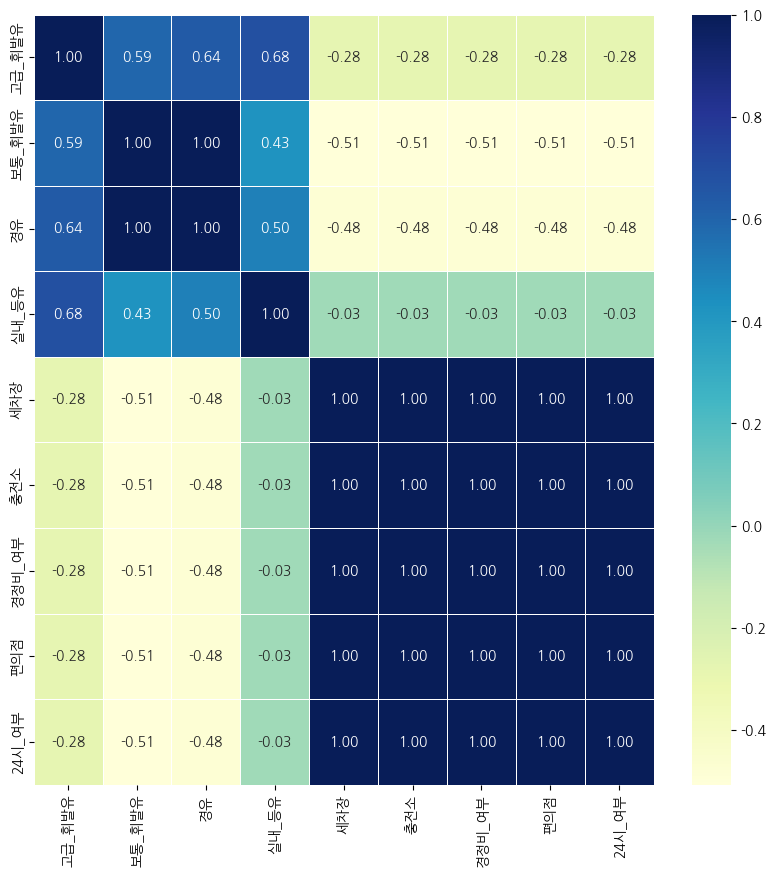

In [34]:
plt.figure(figsize=(10,10))
sns.heatmap(data = statdf2.corr(), annot=True, fmt = '.2f', linewidths=.5, cmap='YlGnBu')

In [35]:
gu_os_sum.corr()

,총계,고급휘발유_평균,보통휘발유_평균,경유_평균,실내등유_평균
총계,1.000000,-0.026828,-0.078175,-0.072558,-0.392832
고급휘발유_평균,-0.026828,1.000000,0.879368,0.897963,-0.003473
보통휘발유_평균,-0.078175,0.879368,1.000000,0.992113,0.222478
경유_평균,-0.072558,0.897963,0.992113,1.000000,0.188993
실내등유_평균,-0.392832,-0.003473,0.222478,0.188993,1.000000


<Axes: >

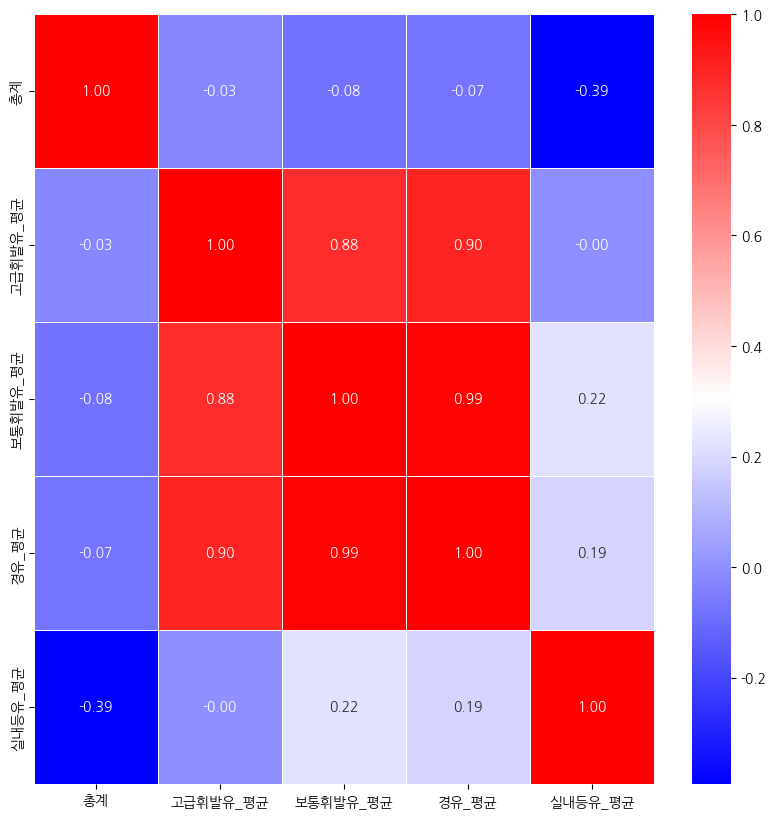

In [36]:
plt.figure(figsize=(10,10))
sns.heatmap(data = gu_os_sum.corr(), annot=True, fmt = '.2f', linewidths=.5, cmap='bwr')

/tmp/ipykernel_24482/1547151613.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0,0].set_xticklabels(ax[0,0].get_xticklabels(), rotation=45)
/tmp/ipykernel_24482/1547151613.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0,1].set_xticklabels(ax[0,1].get_xticklabels(), rotation=45)
/tmp/ipykernel_24482/1547151613.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1,0].set_xticklabels(ax[1,0].get_xticklabels(), rotation=45)
/tmp/ipykernel_24482/1547151613.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1,1].set_xticklabels(ax[1,1].get_xticklabels(), rotation=45)


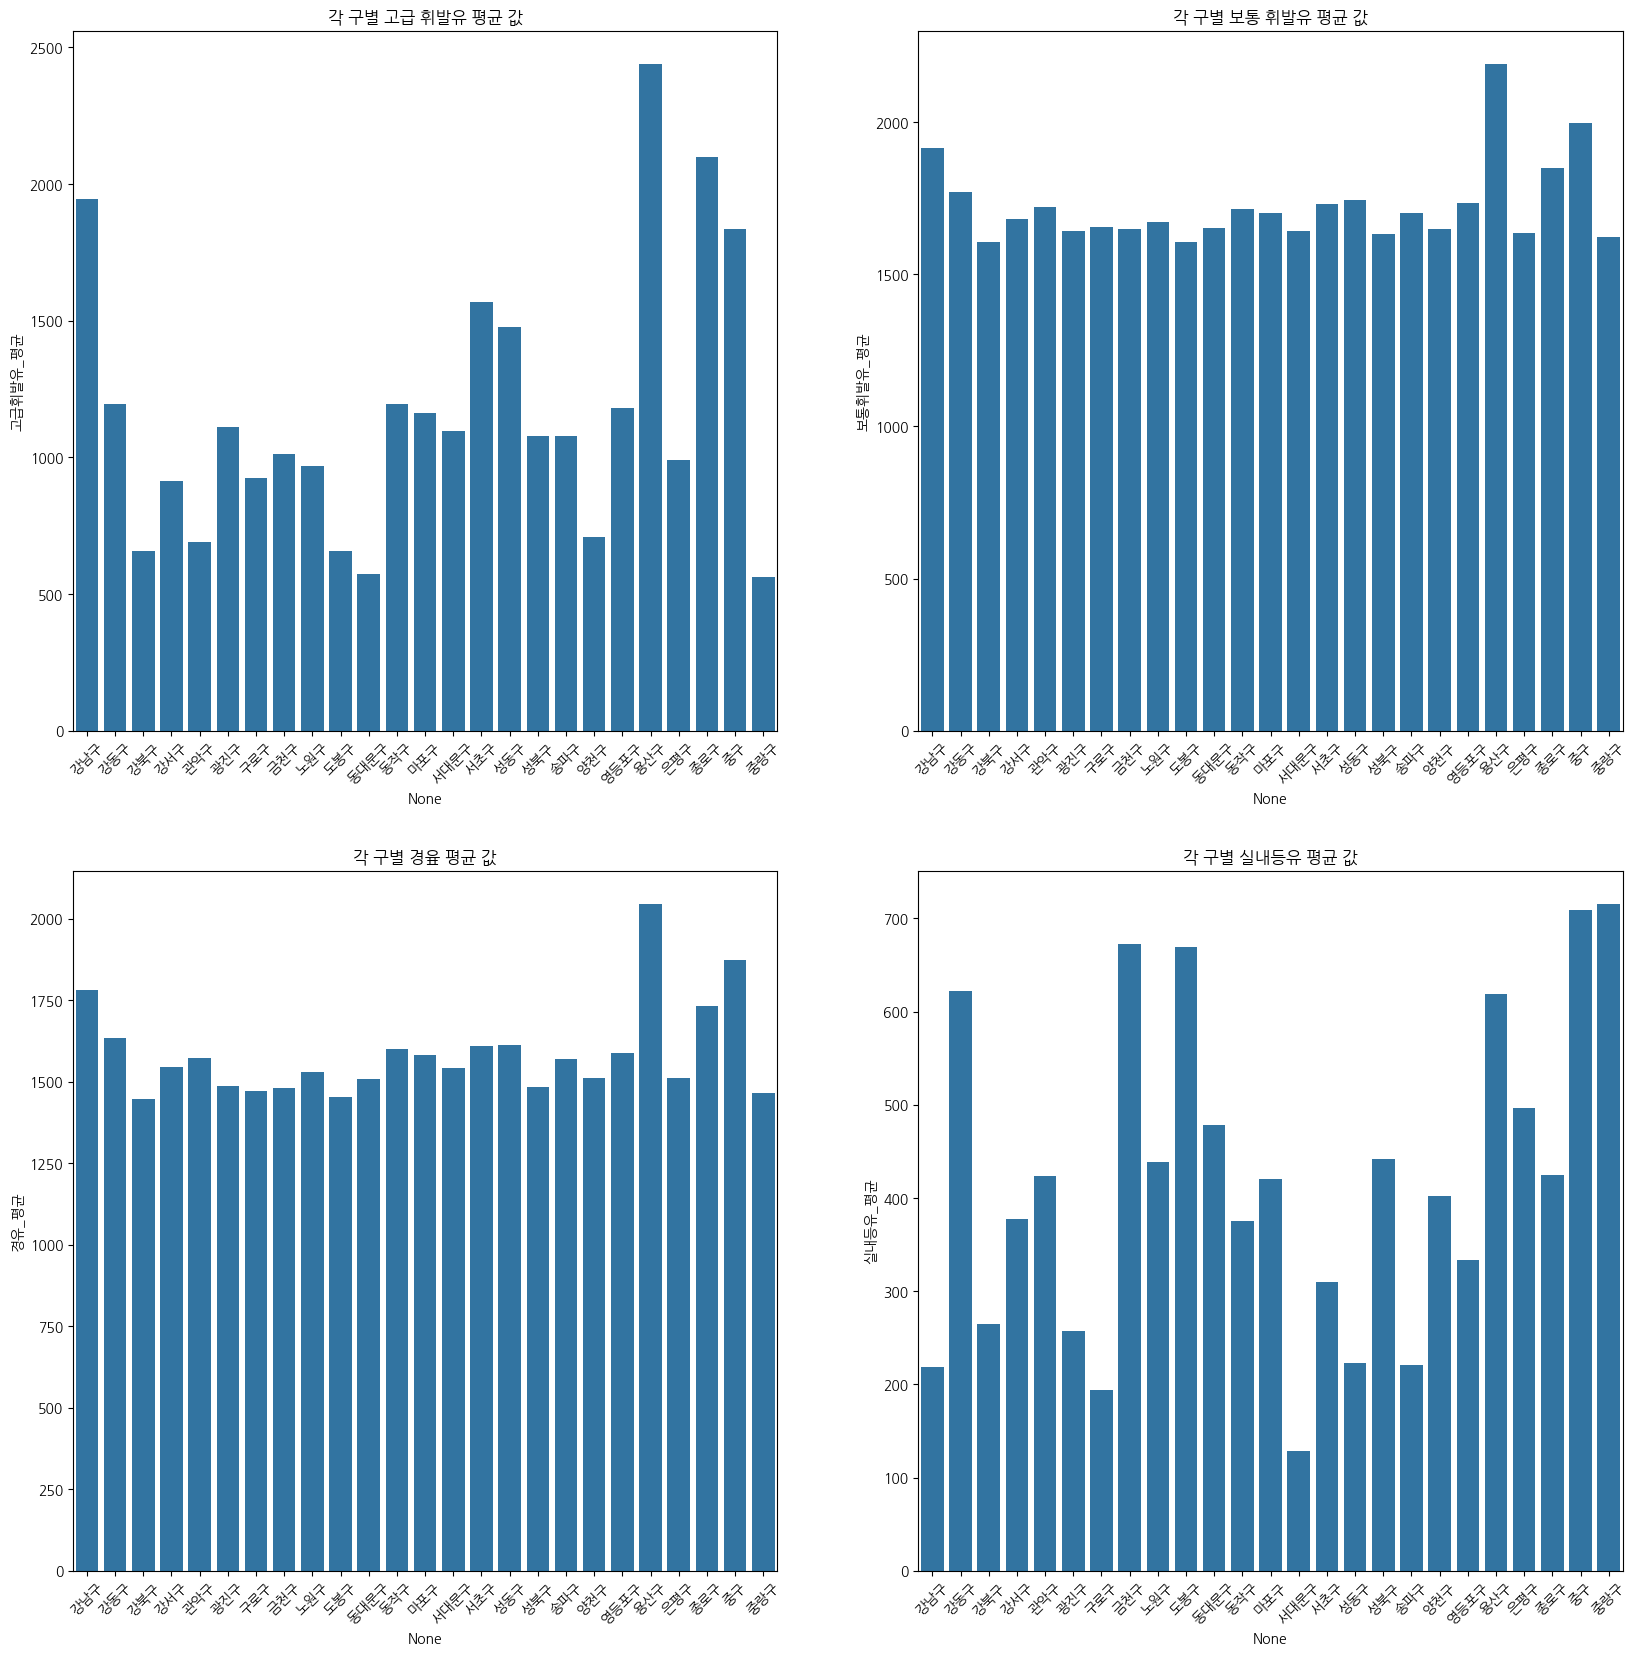

In [37]:
import koreanize_matplotlib
fig, ax = plt.subplots(2, 2, figsize=(20, 20))
sns.barplot(data=gu_os_sum, x=gu_os_sum.index, y="고급휘발유_평균", ax=ax[0,0]).set_title("각 구별 고급 휘발유 평균 값")
ax[0,0].set_xticklabels(ax[0,0].get_xticklabels(), rotation=45)
sns.barplot(data=gu_os_sum, x=gu_os_sum.index, y="보통휘발유_평균", ax=ax[0,1]).set_title("각 구별 보통 휘발유 평균 값")
ax[0,1].set_xticklabels(ax[0,1].get_xticklabels(), rotation=45)
sns.barplot(data=gu_os_sum, x=gu_os_sum.index, y="경유_평균", ax=ax[1,0]).set_title("각 구별 경윺 평균 값")
ax[1,0].set_xticklabels(ax[1,0].get_xticklabels(), rotation=45)
sns.barplot(data=gu_os_sum, x=gu_os_sum.index, y="실내등유_평균", ax=ax[1,1]).set_title("각 구별 실내등유 평균 값")
ax[1,1].set_xticklabels(ax[1,1].get_xticklabels(), rotation=45)
print("")

In [38]:
gu_os_sum["총_평균"] = 0
for idx, i in enumerate(gu_os_sum.index):
    gu_os_sum["총_평균"][idx] = gu_os_sum.iloc[idx,1:].mean()
gu_os_sum.head()

/tmp/ipykernel_24482/3592889694.py:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  gu_os_sum["총_평균"][idx] = gu_os_sum.iloc[idx,1:].mean()
/tmp/ipykernel_24482/3592889694.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy o

,총계,고급휘발유_평균,보통휘발유_평균,경유_평균,실내등유_평균,총_평균
강남구,30,1944.033333,1914.400000,1783.333333,219.000000,1172.153333
강동구,13,1196.769231,1771.153846,1635.923077,622.230769,1045.215385
강북구,11,656.000000,1606.272727,1447.181818,264.545455,794.800000
강서구,33,913.393939,1682.151515,1544.909091,376.939394,903.478788
관악구,14,689.214286,1721.214286,1572.142857,424.142857,881.342857


/tmp/ipykernel_24482/4239550208.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


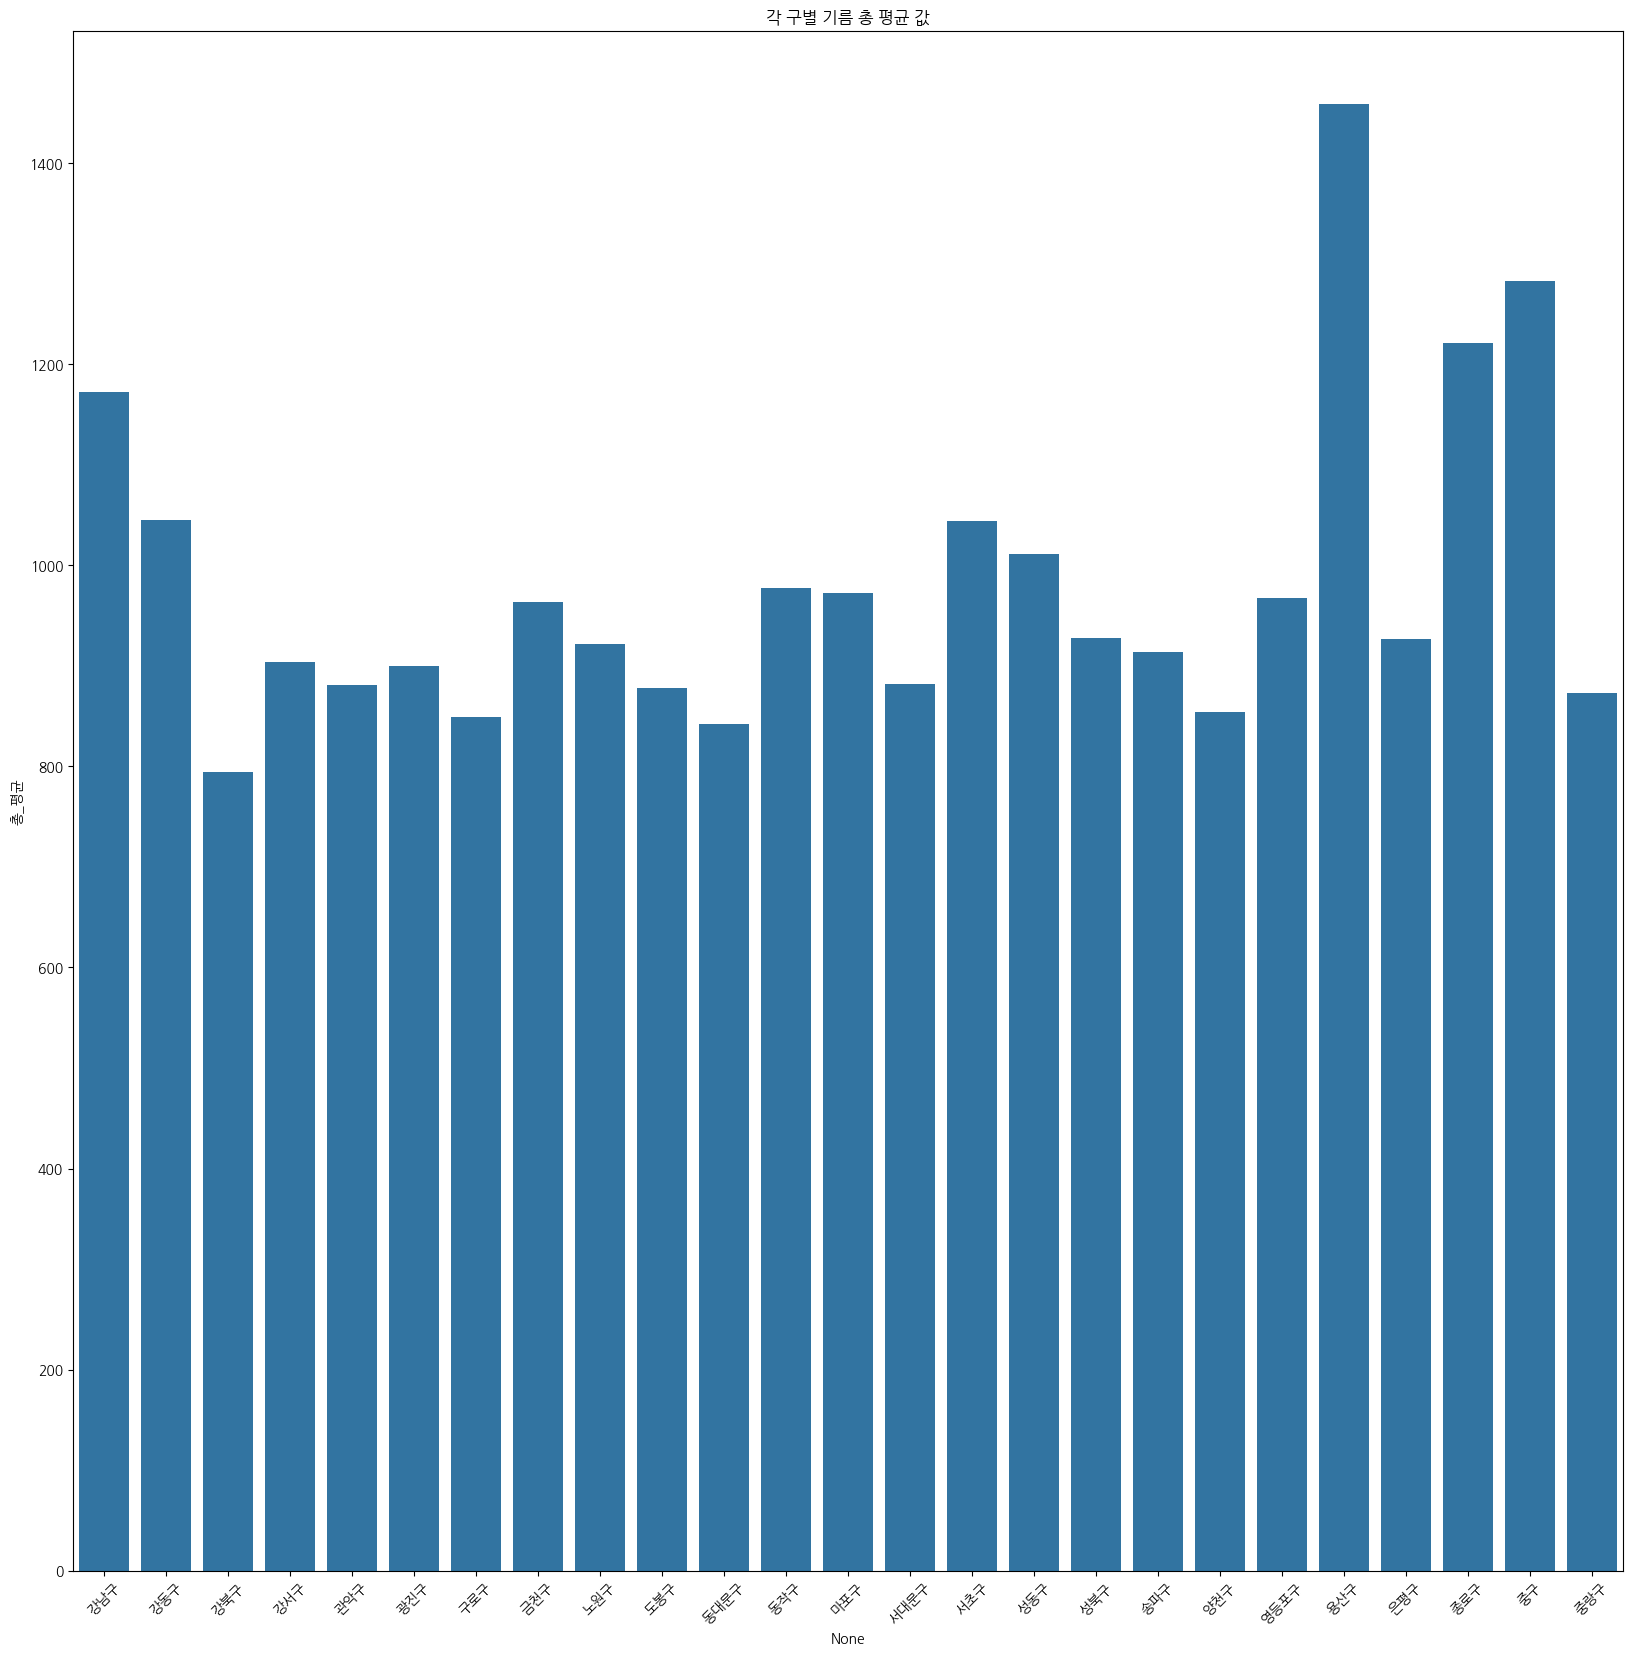

In [39]:
fig, ax = plt.subplots(1, figsize=(20, 20))
sns.barplot(data=gu_os_sum, x=gu_os_sum.index, y="총_평균", ax=ax).set_title("각 구별 기름 총 평균 값")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
print("")

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 428 entries, 0 to 427
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   주유소_이름  428 non-null    object
 1   상표      428 non-null    object
 2   구       428 non-null    object
 3   주소      428 non-null    object
 4   고급_휘발유  428 non-null    int64 
 5   보통_휘발유  428 non-null    int64 
 6   경유      428 non-null    int64 
 7   실내_등유   428 non-null    int64 
 8   세차장     428 non-null    int64 
 9   충전소     428 non-null    int64 
 10  경정비_여부  428 non-null    int64 
 11  편의점     428 non-null    int64 
 12  24시_여부  428 non-null    int64 
dtypes: int64(9), object(4)
memory usage: 43.6+ KB


In [41]:
gu_os_sum_ni = gu_os_sum.reset_index()
gu_os_sum_ni

,index,총계,고급휘발유_평균,보통휘발유_평균,경유_평균,실내등유_평균,총_평균
0,강남구,30,1944.033333,1914.400000,1783.333333,219.000000,1172.153333
1,강동구,13,1196.769231,1771.153846,1635.923077,622.230769,1045.215385
2,강북구,11,656.000000,1606.272727,1447.181818,264.545455,794.800000
3,강서구,33,913.393939,1682.151515,1544.909091,376.939394,903.478788
4,관악구,14,689.214286,1721.214286,1572.142857,424.142857,881.342857
5,광진구,12,1111.250000,1640.250000,1488.583333,257.333333,899.483333
6,구로구,18,924.222222,1653.833333,1471.944444,194.444444,848.888889
7,금천구,11,1012.000000,1647.727273,1482.363636,672.727273,962.963636
8,노원구,14,969.857143,1672.214286,1530.071429,438.571429,922.142857
9,도봉구,15,659.133333,1606.733333,1453.266667,669.000000,877.626667


/tmp/ipykernel_24482/3162290434.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=gu_os_sum, x=gu_os_sum.index, y="총_평균", ax=ax, palette="Set1").set_title("각 구별 기름 총 평균 값")
/tmp/ipykernel_24482/3162290434.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


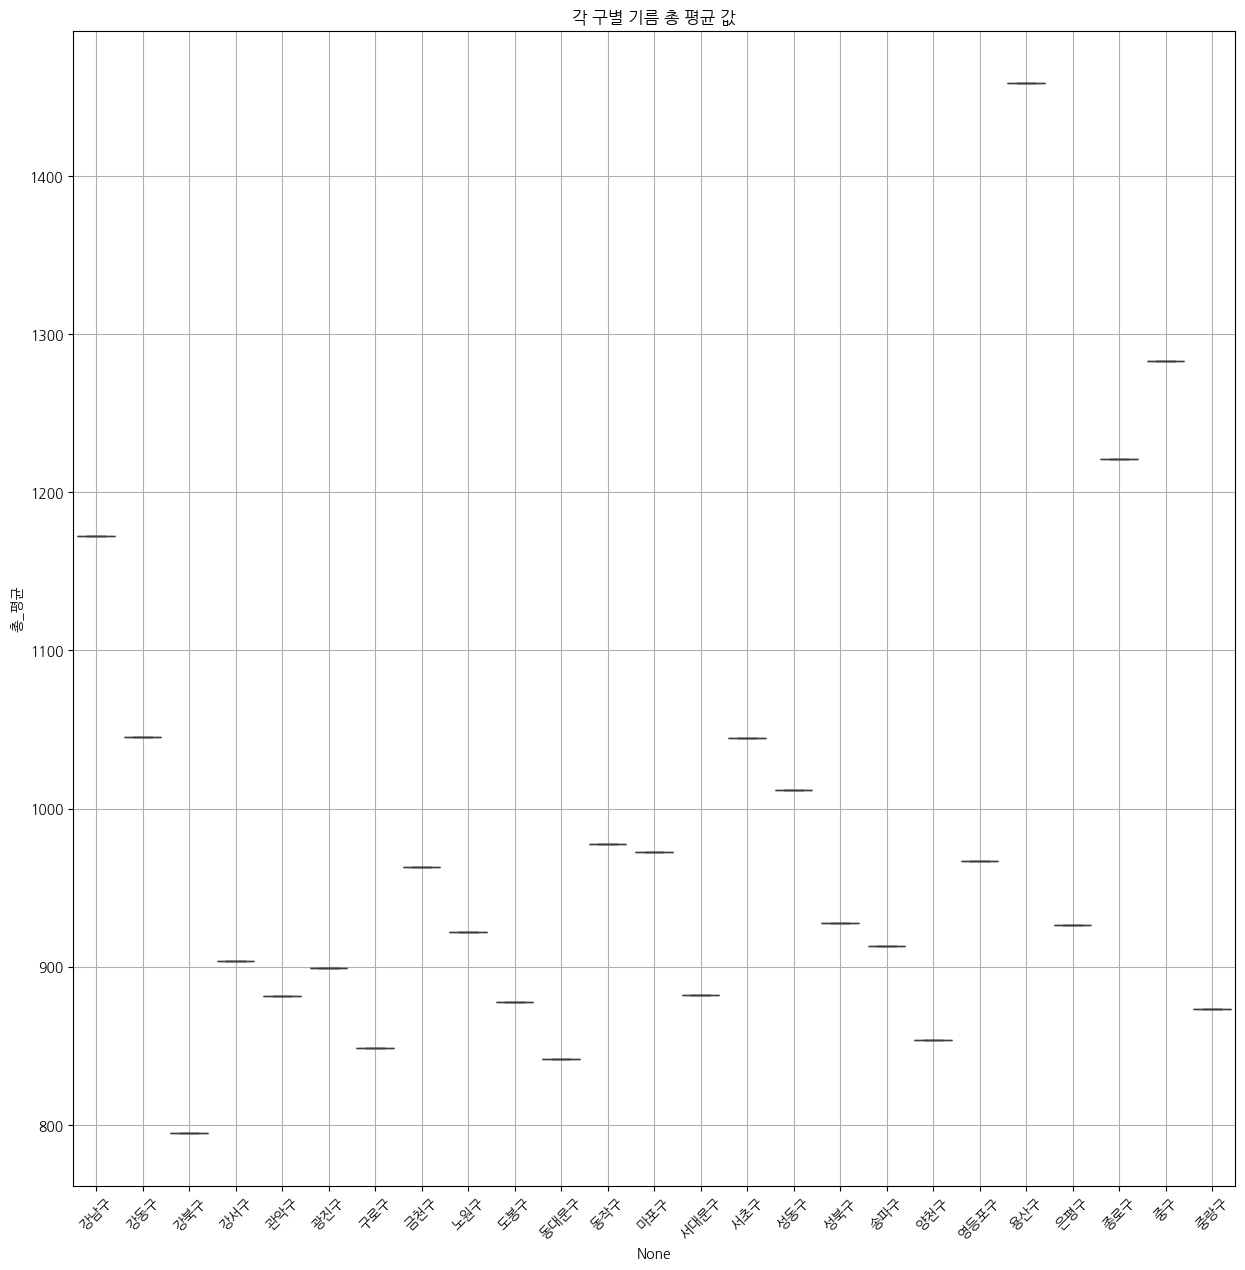

In [42]:
fig, ax = plt.subplots(1, figsize=(15, 15))
sns.boxplot(data=gu_os_sum, x=gu_os_sum.index, y="총_평균", ax=ax, palette="Set1").set_title("각 구별 기름 총 평균 값")
ax.grid()
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
print("")

In [43]:
import json
import folium
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

In [44]:
gu_os_sum.sort_values(by="고급휘발유_평균", ascending=True).head(10)

,총계,고급휘발유_평균,보통휘발유_평균,경유_평균,실내등유_평균,총_평균
중랑구,13,563.615385,1622.538462,1465.538462,715.384615,873.415385
동대문구,16,572.312500,1650.750000,1507.750000,478.125000,841.787500
강북구,11,656.000000,1606.272727,1447.181818,264.545455,794.800000
도봉구,15,659.133333,1606.733333,1453.266667,669.000000,877.626667
관악구,14,689.214286,1721.214286,1572.142857,424.142857,881.342857
양천구,24,708.666667,1648.541667,1510.458333,401.666667,853.866667
강서구,33,913.393939,1682.151515,1544.909091,376.939394,903.478788
구로구,18,924.222222,1653.833333,1471.944444,194.444444,848.888889
노원구,14,969.857143,1672.214286,1530.071429,438.571429,922.142857
은평구,15,989.533333,1634.600000,1512.266667,496.266667,926.533333


<h1>고급 휘발유 지역별 평균 가격차 표시</h1>

In [45]:
gu_os_sum.sort_values(by="고급휘발유_평균", ascending=False).head(10)
gu_data = pd.pivot_table(data=gu_os_sum, index=gu_os_sum.index, values="고급휘발유_평균", aggfunc=np.mean)
gu_data.sort_values(by="고급휘발유_평균", ascending=False).head()

,고급휘발유_평균
용산구,2439.000000
종로구,2098.125000
강남구,1944.033333
중구,1835.200000
서초구,1568.870968


In [46]:
import folium

geo_path = "../data/skorea_municipalities_geo_simple.json"
geo_str = json.load(open(geo_path, encoding="utf-8"))

map = folium.Map(location=[37.5502, 126.982], zoom_start=10.5, titles="OpenStreetMap")
setting = folium.Choropleth(geo_data=geo_str,
                            data=gu_data,
                            columns=[gu_data.index, "고급휘발유_평균"],
                            key_on="properties.name",
                            fill_color="OrRd")

setting.add_to(map)
map

<h1>보통 휘발유 지역별 평균 가격차 표시</h1>

In [47]:
gu_os_sum.sort_values(by="보통휘발유_평균", ascending=False).head(10)
gu_data = pd.pivot_table(data=gu_os_sum, index=gu_os_sum.index, values="보통휘발유_평균", aggfunc=np.mean)
gu_data.sort_values(by="보통휘발유_평균", ascending=False).head()

,보통휘발유_평균
용산구,2190.000000
중구,1997.700000
강남구,1914.400000
종로구,1849.000000
강동구,1771.153846


In [48]:
import folium

geo_path = "../data/skorea_municipalities_geo_simple.json"
geo_str = json.load(open(geo_path, encoding="utf-8"))

map = folium.Map(location=[37.5502, 126.982], zoom_start=10.5, titles="OpenStreetMap")
setting = folium.Choropleth(geo_data=geo_str,
                            data=gu_data,
                            columns=[gu_data.index, "보통휘발유_평균"],
                            key_on="properties.name",
                            fill_color="PuBu")

setting.add_to(map)
map

<h1>경유 지역별 평균 가격차 표시</h1>

In [49]:
gu_os_sum.sort_values(by="경유_평균", ascending=False).head(10)
gu_data = pd.pivot_table(data=gu_os_sum, index=gu_os_sum.index, values="경유_평균", aggfunc=np.mean)
gu_data.sort_values(by="경유_평균", ascending=False).head()

,경유_평균
용산구,2045.416667
중구,1873.200000
강남구,1783.333333
종로구,1732.875000
강동구,1635.923077


In [ ]:
# mycursor = conn.cursor()
# sql = open("./data/quiz.sql").read()

# mycursor.execute(sql)

In [50]:
import folium

geo_path = "../data/skorea_municipalities_geo_simple.json"
geo_str = json.load(open(geo_path, encoding="utf-8"))

map = folium.Map(location=[37.5502, 126.982], zoom_start=10.5, titles="OpenStreetMap")
setting = folium.Choropleth(geo_data=geo_str,
                            data=gu_data,
                            columns=[gu_data.index, "경유_평균"],
                            key_on="properties.name",
                            fill_color="YlGn")

setting.add_to(map)
map

<h1>실내 등유 지역별 평균 가격차 표시</h1>

In [51]:
gu_os_sum.sort_values(by="실내등유_평균", ascending=False).head(10)
gu_data = pd.pivot_table(data=gu_os_sum, index=gu_os_sum.index, values="실내등유_평균", aggfunc=np.mean)
gu_data.sort_values(by="실내등유_평균", ascending=False).head()

,실내등유_평균
중랑구,715.384615
중구,709.000000
금천구,672.727273
도봉구,669.000000
강동구,622.230769


In [52]:
import folium

geo_path = "../data/skorea_municipalities_geo_simple.json"
geo_str = json.load(open(geo_path, encoding="utf-8"))

map = folium.Map(location=[37.5502, 126.982], zoom_start=10.5, titles="OpenStreetMap")
setting = folium.Choropleth(geo_data=geo_str,
                            data=gu_data,
                            columns=[gu_data.index, "실내등유_평균"],
                            key_on="properties.name",
                            fill_color="YlOrRd")

setting.add_to(map)
map

<h1>지역별 총 평균 가격차 표시</h1>

In [53]:
gu_os_sum.sort_values(by="총_평균", ascending=False).head(10)
gu_data = pd.pivot_table(data=gu_os_sum, index=gu_os_sum.index, values="총_평균", aggfunc=np.mean)
gu_data.sort_values(by="총_평균", ascending=False).head()

,총_평균
용산구,1458.583333
중구,1283.020000
종로구,1221.000000
강남구,1172.153333
강동구,1045.215385


In [54]:
import folium

geo_path = "../data/skorea_municipalities_geo_simple.json"
geo_str = json.load(open(geo_path, encoding="utf-8"))

map = folium.Map(location=[37.5502, 126.982], zoom_start=10.5, titles="OpenStreetMap")
setting = folium.Choropleth(geo_data=geo_str,
                            data=gu_data,
                            columns=[gu_data.index, "총_평균"],
                            key_on="properties.name",
                            fill_color="RdPu")

setting.add_to(map)
map

In [55]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service

In [56]:
f = open("../data/oil_input.txt", "w")
f.close()
f = open("../data/oil_output.txt", "w")
f.close()

In [57]:
with open("../data/oil_input.txt", "w") as f:
    for idx, i in enumerate(df["주소"]):
        data = str(df["주소"][idx]) + "\n"
        f.write(data)
        # print(idx)
        # print(data)
len(df)

428

In [58]:
import requests

def get_coordinates(address, client_id, client_secret):
    url = "https://naveropenapi.apigw.ntruss.com/map-geocode/v2/geocode"
    headers = {
        "X-NCP-APIGW-API-KEY-ID": client_id,
        "X-NCP-APIGW-API-KEY": client_secret
    }
    params = {"query": address}
    response = requests.get(url, headers=headers, params=params)
    
    if response.status_code == 200:
        data = response.json()
        if data['addresses']:
            latitude = float(data['addresses'][0]['y'])
            longitude = float(data['addresses'][0]['x'])
            return f"{latitude:.2f},{longitude:.2f}"
        else:
            return "0.00,0.00"
    else:
        print(f"오류 발생 - 상태 코드: {response.status_code}, 응답: {response.text}")
        return "0.00,0.00"

def process_addresses(input_file, output_file, client_id, client_secret):
    with open(input_file, 'r', encoding='utf-8') as file:
        addresses = file.readlines()

    with open(output_file, 'w', encoding='utf-8') as file:
        for address in addresses:
            address = address.strip()
            if address:
                coordinates = get_coordinates(address, client_id, client_secret)
                file.write(f"{address}: {coordinates}\n")

# 사용 예시
client_id = "ajby0mvu9q"
client_secret = "jM01EVKbyurr3no19Fux0CqxvgPEhPf7viwyIGt3"
process_addresses('../data/oil_input.txt', '../data/oil_output.txt', client_id, client_secret)

In [59]:
import folium

In [61]:
lat_lng_list = []
lat = []
lng = []
with open("../data/oil_output.txt", "r") as f:
    for idx, i in enumerate(f):
        data = f.readline()
        lat_lng_list.append(data[data.find(": ")+2:].replace('\n', '').replace('\t', '').replace(' ',''))
        t1, t2 = lat_lng_list[idx].split(',')
        # print(lat_lng_list[idx].split(','))
        lat.append(float(t1))
        lng.append(float(t2))
# print(lat_lng_list[0].split(','))
# x, y = lat_lng_list[idx].split(',')
# print(x, y)
# print(x)
print(lat)
print(lng)

[37.47, 37.49, 37.49, 37.5, 37.48, 37.5, 37.49, 37.51, 37.51, 37.52, 37.51, 37.49, 37.53, 37.52, 37.51, 37.54, 37.53, 37.53, 37.56, 37.53, 37.55, 37.62, 37.63, 37.64, 37.64, 37.63, 37.62, 37.55, 37.56, 37.57, 37.57, 37.53, 37.57, 37.55, 37.55, 37.54, 37.55, 37.56, 37.57, 37.57, 37.56, 37.56, 37.56, 37.48, 37.47, 37.48, 37.48, 37.49, 37.47, 37.48, 37.57, 37.55, 37.56, 37.57, 37.57, 37.54, 37.5, 37.5, 37.49, 37.51, 37.5, 37.5, 37.5, 37.49, 37.49, 37.48, 37.48, 37.47, 37.47, 37.44, 37.45, 37.64, 37.62, 37.65, 37.66, 37.66, 37.63, 37.63, 37.66, 37.69, 37.67, 37.66, 37.64, 37.66, 37.65, 37.57, 37.59, 37.58, 37.58, 37.59, 37.59, 37.57, 37.58, 37.49, 37.51, 37.51, 37.5, 37.57, 37.56, 37.55, 37.55, 37.55, 37.54, 37.57, 37.57, 37.59, 37.57, 37.56, 37.58, 37.56, 37.46, 37.47, 37.46, 37.48, 37.47, 37.49, 37.5, 37.5, 37.49, 37.5, 37.48, 37.51, 37.49, 37.46, 37.48, 37.48, 37.56, 37.55, 37.54, 37.56, 37.55, 37.55, 37.55, 37.54, 37.58, 37.61, 37.59, 37.6, 37.59, 37.62, 37.6, 37.6, 37.6, 37.61, 37.61,

<h1>서울 전체의 주유소 위치</h1>

In [62]:
for idx, row in enumerate(lat_lng_list):
    if row == None:
        continue
    else :
        folium.Marker(
            location=[lat[idx], lng[idx]], 
            popup=(df["주소"][idx]),
            icon=folium.Icon(icon="cog", color="green")
        ).add_to(mapping)

mapping

<h1>종합</h1>

In [63]:
gu_os_sum.sort_values(by="총_평균", ascending=False).head(10)
gu_data = pd.pivot_table(data=gu_os_sum, index=gu_os_sum.index, values="총_평균", aggfunc=np.mean)
top_price_gu = gu_data.sort_values(by="총_평균", ascending=False).index[0]
gu_data.sort_values(by="총_평균", ascending=False).head()


,총_평균
용산구,1458.583333
중구,1283.020000
종로구,1221.000000
강남구,1172.153333
강동구,1045.215385


In [64]:
f = open("../data/top_oil_price_in.txt", "w")
f.close()
f = open("../data/top_oil_price_out.txt", "w")
f.close()

with open("../data/top_oil_price_in.txt", "w") as f:
    data = "서울시 " + str(top_price_gu)
    f.write(data)
process_addresses('../data/top_oil_price_in.txt', '../data/top_oil_price_out.txt', client_id, client_secret)

In [65]:
lat_lng_temp = ''
top_price_lat = .0
top_price_lng = .0

with open("../data/top_oil_price_out.txt", "r") as f:
    data = f.readline()
    llat_lng_temp = data[data.find(": ")+2:].replace('\n', '').replace('\t', '').replace(' ','')
    t1, t2 = llat_lng_temp.split(',')
    print(type(t1), t2)
    # print(lat_lng_list[idx].split(','))
    top_price_lat= float(t1)
    top_price_lng= float(t2)
# print(lat_lng_list[0].split(','))
# x, y = lat_lng_list[idx].split(',')
# print(x, y)
# print(x)
print(top_price_lat)
print(top_price_lng)

<class 'str'> 126.99
37.53
126.99


In [66]:
mapping = folium.Map(location=[37.5502, 126.982], zoom_start=10.5, titles="OpenStreetMap")
setting = folium.Choropleth(geo_data=geo_str,
                            data=gu_data,
                            columns=[gu_data.index, "총_평균"],
                            key_on="properties.name",
                            fill_color="RdPu")

for idx, row in enumerate(lat_lng_list):
    if row == None:
        continue
    else :
        folium.Marker(
            location=[lat[idx], lng[idx]], 
            popup=(df["주소"][idx]),
            icon=folium.Icon(icon="cog", color="green")
        ).add_to(mapping)

# 가장 비싼 지역 표시
folium.Circle(
    radius=3000,
    # geo_data=geo_str,
    # data=gu_data.index[0],
    weight=7,
    location=[top_price_lat, top_price_lng],
    popup="가장 기름이 비싼 지역",
    color='blue', fill=False
).add_to(setting)


geo_path = "../data/skorea_municipalities_geo_simple.json"
geo_str = json.load(open(geo_path, encoding="utf-8"))

setting.add_to(mapping)

mapping

<h3>아래는 test 코드</h3>

In [67]:
page = driver.page_source
soup = BeautifulSoup(page, "html")
# print(soup.prettify)

test1 = soup.find("tbody", id="infoTbody")
print(test1.text)
test2 = test1.find_all("tr")
print(test2[2])
print(test2[0].text)
test3 = test2[1].find_all("td")
print(test3[0].text)

# print(("고급휘발유" == test3[0].text))
# print(len(test2))
# for idx, x in enumerate(test2):
#     print(test2[idx].text)

# test3 = test2[1].find_all("td")
# print(test3[1].text)

# if ("보통휘발유" == test3[0].text and test3[1].text != "원"):
#     print("a")
# else:
#     print("b")

# if ("고급휘발유" == test3[0].text and test3[1].text != "원"):
#     print("a")
# else:
#     print("b")

print(test3[1].text != "원")
print(test3[1].text)

  고급휘발유 원    보통휘발유 1,698원 2024-09-03　　14:55:21   경유 1,498원 2024-09-03　　13:58:58   실내등유 1,600원 2024-08-29　　07:57:26   자동차부탄 원   
<tr id="d047Div"> <td class="nobd_l" scope="col">경유</td> <td><label id="d047_p">1,498</label>원</td> <td><label id="cha_aft_fin_dt3">2024-09-03　　13:58:58</label></td> </tr>
 고급휘발유 원  
보통휘발유
True
1,698원


In [68]:
page = driver.page_source
soup = BeautifulSoup(page, "html")
# print(soup.prettify)

test1 = soup.find("div", class_="gis_detail_info_bcon mgt_20")
print(test1)
test2 = test1.find(class_="service")
print(test2)
test3 = test2.find_all("img")
print(test3[0])
test4 = test3[0]
print(test4.attrs['src'])
test5 = test4.attrs['src']
print(test5.find("off"))
print(test3[1])
test4 = test3[1]
print(test4.attrs['src'])
test5 = test4.attrs['src']
print(test5.find("off"))

<div class="gis_detail_info_bcon mgt_20"> <div class="desc_box"> <div class="d_left"><span class="gis_dpopup_tt">부가정보</span></div> </div> <div class="service"> <img alt="세차장" id="cwsh_yn" src="/images/user/gis/oil_station_service1_01.gif"/> <img alt="충전소" id="lpg_yn" src="/images/user/gis/oil_station_service1_02_01_off.gif"/> <img alt="경정비" id="maint_yn" src="/images/user/gis/oil_station_service1_03_off.gif"/> <img alt="편의점" id="cvs_yn" src="/images/user/gis/oil_station_service1_04_off.gif"/> <img alt="24시영업" id="sel24_yn" src="/images/user/gis/oil_station_service1_05_off.gif"/> </div> </div>
<div class="service"> <img alt="세차장" id="cwsh_yn" src="/images/user/gis/oil_station_service1_01.gif"/> <img alt="충전소" id="lpg_yn" src="/images/user/gis/oil_station_service1_02_01_off.gif"/> <img alt="경정비" id="maint_yn" src="/images/user/gis/oil_station_service1_03_off.gif"/> <img alt="편의점" id="cvs_yn" src="/images/user/gis/oil_station_service1_04_off.gif"/> <img alt="24시영업" id="sel24_yn" src="/ima